In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import Image

# 2 Sample Z-test 

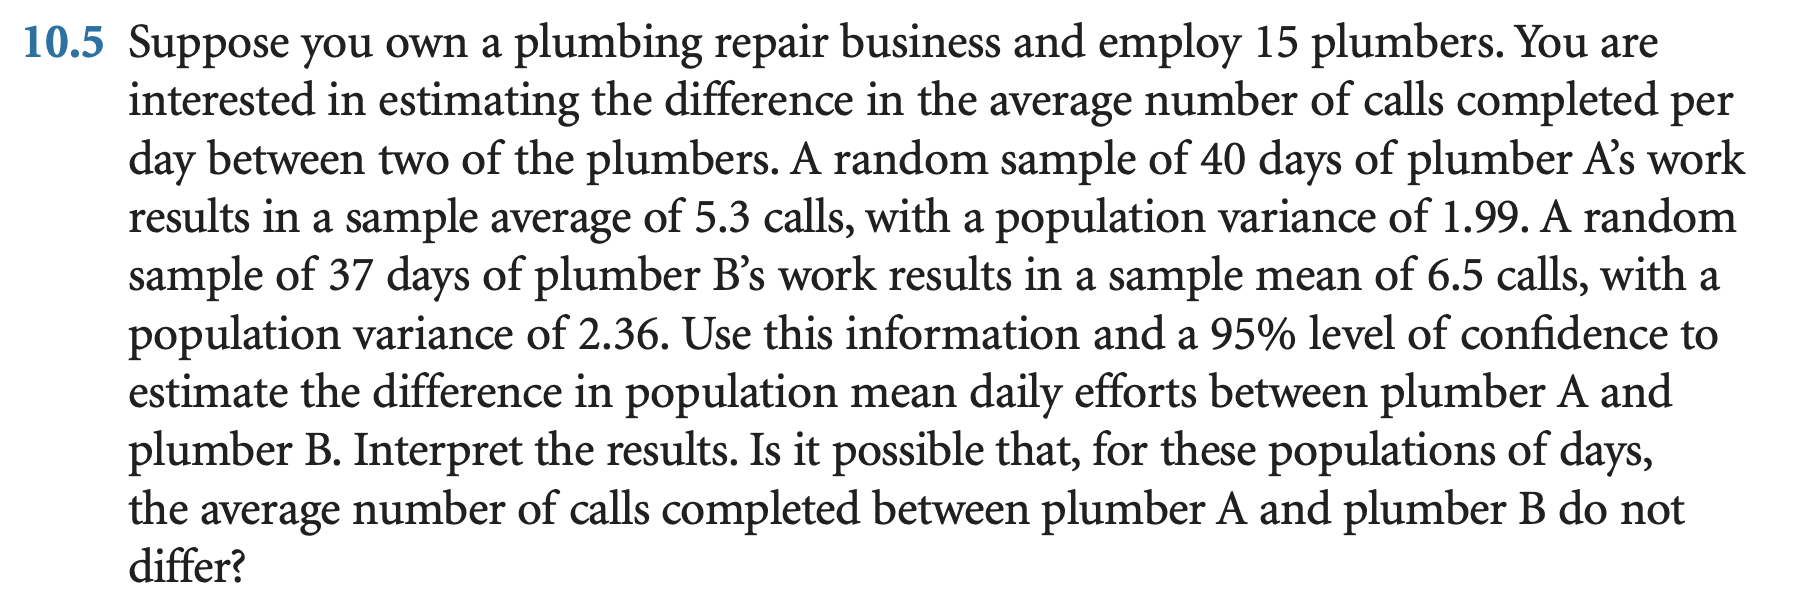

In [2]:
Image('./images/2samplez.png')

In [2]:
data = pd.DataFrame({'A':[40,5.3,1.99],'B':[37,6.5,2.36]}, index=['n','x_hat','sigma'])
data

,A,B
n,40.00,37.00
x_hat,5.30,6.50
sigma,1.99,2.36


In [10]:
lower_bound = (data.B.x_hat-data.A.x_hat)+stats.norm.ppf(0.025)* \
                np.sqrt((data.A.sigma/data.A.n)+(data.B.sigma/data.B.n))

In [11]:
upper_bound = (data.B.x_hat-data.A.x_hat)-stats.norm.ppf(0.025)* \
                np.sqrt((data.A.sigma/data.A.n)+(data.B.sigma/data.B.n))

In [12]:
print(f'{lower_bound} <= mu1-mu2 <= {upper_bound}')

0.539594552442974 <= mu1-mu2 <= 1.8604054475570262


**0 difference in the population means of these two plumbers is unlikely, because zero is not in the 95% range.**

# Paired t-test

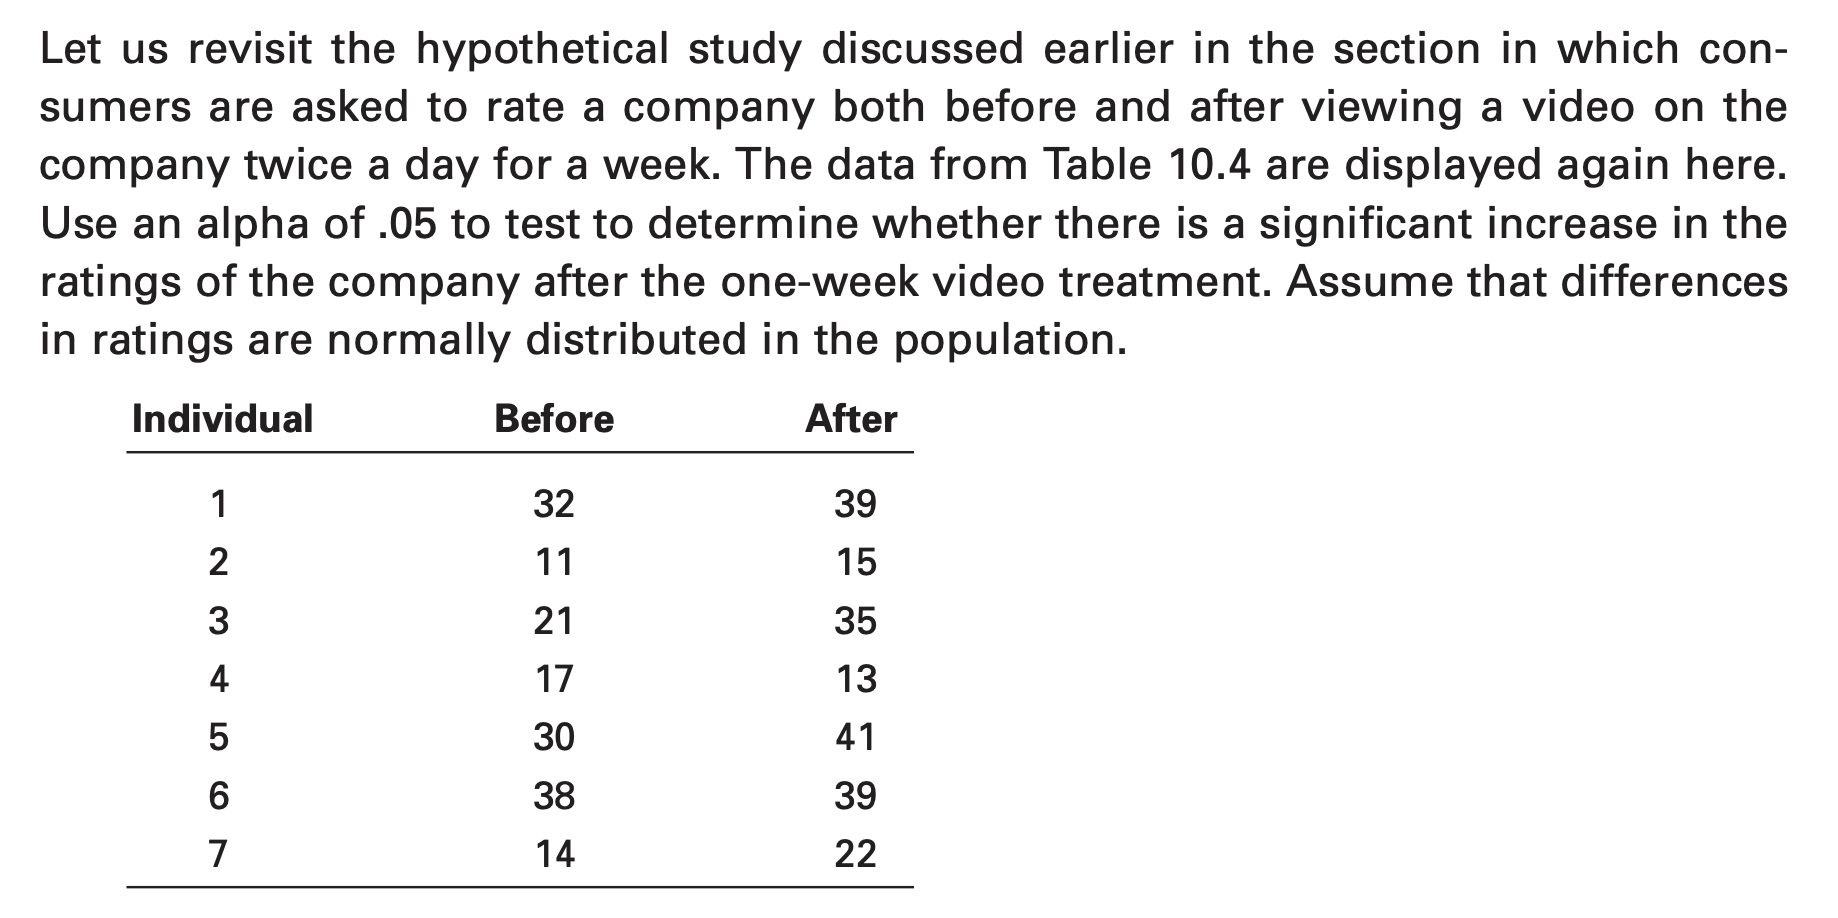

In [3]:
Image('./images/pairedttest.png')

In [13]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 450.5 kB/s eta 0:00:00a 0:00:01


In [14]:
data = pd.DataFrame({'before':[32,11,21,17,30,38,14],
                    'after':[39,15,35,13,41,39,22]})
data

,before,after
0,32,39
1,11,15
2,21,35
3,17,13
4,30,41
5,38,39
6,14,22


In [15]:
import pingouin as pin

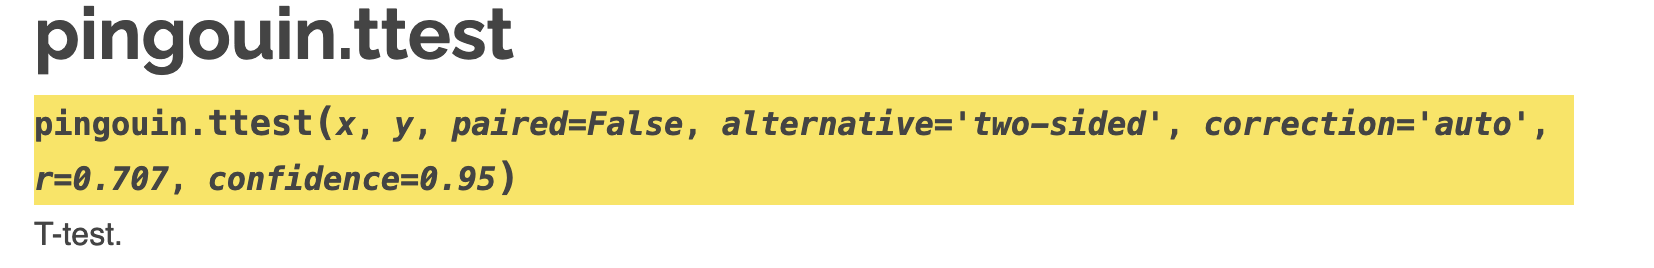

In [4]:
Image('./images/pingouin-ttest.png')

H0: D = 0<br>
Ha: D > 0

In [36]:
paired_ttest = pin.ttest(data.after.values,data.before.values,paired=True,alternative='greater',confidence=0.95)

In [37]:
paired_ttest

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.542712,6,greater,0.02196,"[1.38, inf]",0.523829,4.369,0.339258


In [38]:
paired_ttest['T']

T-test    2.542712
Name: T, dtype: float64

In [39]:
paired_ttest['p-val'].iloc[0]<0.05

True

**Reject H0. There is enough evidence to conclude that, on average, the ratings have<br>increased significantly. This result might be used by managers to support a decision to<br>continue using the videos or to expand the use of such videos in an effort to increase<br>public support for their company.<br>**